In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('f.csv')
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [17]:
df.drop([105 , 106], axis = 0, inplace = True)

In [18]:
df.columns = ['Month' , 'sales per month']

In [19]:
df['Month']= pd.to_datetime(df['Month'])

In [20]:
df.set_index('Month' , inplace = True)

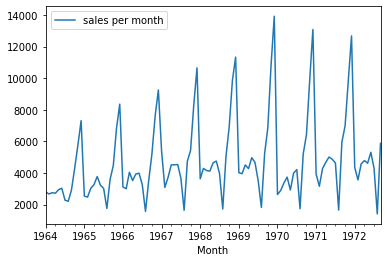

In [21]:
df.plot()

In [22]:
model = sm.tsa.statespace.SARIMAX(df['sales per month'] , order = (1,0,0) , seasonal_order = (1,1,1,12))
result = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


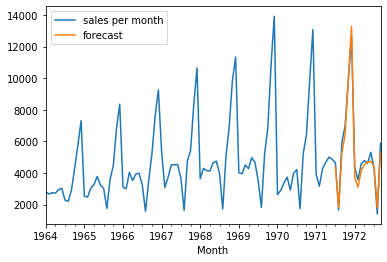

In [23]:
df['forecast'] = result.predict(start = 90 , end = 104 , dynamic = True)
df[['sales per month' , 'forecast']].plot()

In [24]:
from pandas.tseries.offsets import DateOffset

In [25]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,24)]

In [26]:
future_datest_df = pd.DataFrame(index = future_dates[1:] , columns = df.columns)

In [27]:
future_datest_df

,sales per month,forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN
1973-03-01,NaN,NaN
1973-04-01,NaN,NaN
1973-05-01,NaN,NaN
1973-06-01,NaN,NaN
1973-07-01,NaN,NaN


In [28]:
future_df = pd.concat([df , future_datest_df])

In [30]:
future_df

,sales per month,forecast
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN
1964-10-01,4301.0,NaN


In [38]:
future_df['forecast'] = result.predict(start = 104 , end=150 ,dynamic = True)

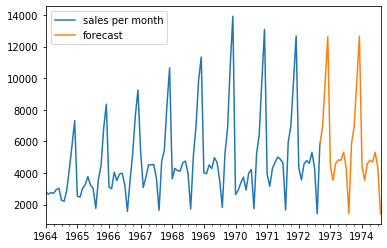

In [39]:
future_df[['sales per month' , 'forecast']].plot()